# **Capstone Project: [Deteksi Penyakit pada Tanaman Kelapa Sawit]**
**ID Group:** LAI25-RM112

**Anggota Kelompok:**
- A200YBF418_Refanda Surya Saputra - A200YBF418@devacademy.id
- A270YAF435_Risky Fahriza - A270YAF435@devacademy.id
- A528YBF449_Sebastian Luth Hasibuan - A528YBF449@devacademy.id
- A184YBF450_Sefza Auma Alam - A184YBF450@devacademy.id

## **Import Libraries/Packages**

In [2]:
import os
import random
import shutil
import warnings
import zipfile

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras import Model, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from PIL import Image
from skimage import io
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.transform import rotate, AffineTransform, warp
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import gdown
from google.colab import drive

print(tf.__version__)

2.18.0


## **Loading Data**

### **Preparation Data**

Menggunakan dataset dari google drive pada google colab

In [3]:
# Mounting dari google drive
drive.mount('/content/drive')

# Mengakses dataset di google drive
dataset_path = '/content/drive/My Drive/Capstone LAI25-RM112/Dataset/palm-disease-dataset.zip'

# Ekstrak dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_file:
    zip_file.extractall('/content/dataset')

Mounted at /content/drive


Mengunduh dataset ke penyimpanan lokal

In [ ]:
# Ketika menggunakan IDE lokal
file_id = "1c9iWUpGHYl-eq057RheOT6q2-hcpj9F4"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, 'palm-disease-dataset.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1c9iWUpGHYl-eq057RheOT6q2-hcpj9F4
From (redirected): https://drive.google.com/uc?id=1c9iWUpGHYl-eq057RheOT6q2-hcpj9F4&confirm=t&uuid=4c716aa7-8a38-4c83-9b1a-f0007b46edad
To: /home/refanzzzz/PycharmProjects/CP-Laskar-AI-LAI25-RM112/palm-disease-dataset.zip
100%|██████████| 779M/779M [02:49<00:00, 4.59MB/s] 


'palm-disease-dataset.zip'

In [ ]:
# Unzip berkas yang telah diuduh dari google drive
with zipfile.ZipFile('palm-disease-dataset.zip', 'r') as zip_file:
    zip_file.extractall()

### Checking Dataset

In [4]:
# Mengecek label pada dataset
palm_disease_path  = "dataset/palm-disease-dataset"

# Menyimpan label
list_label = os.listdir(palm_disease_path)

# Menampilkan list label
list_label

['Magnesium Deficiency', 'Healthy', 'Scale Insect', 'Fungal Disease']

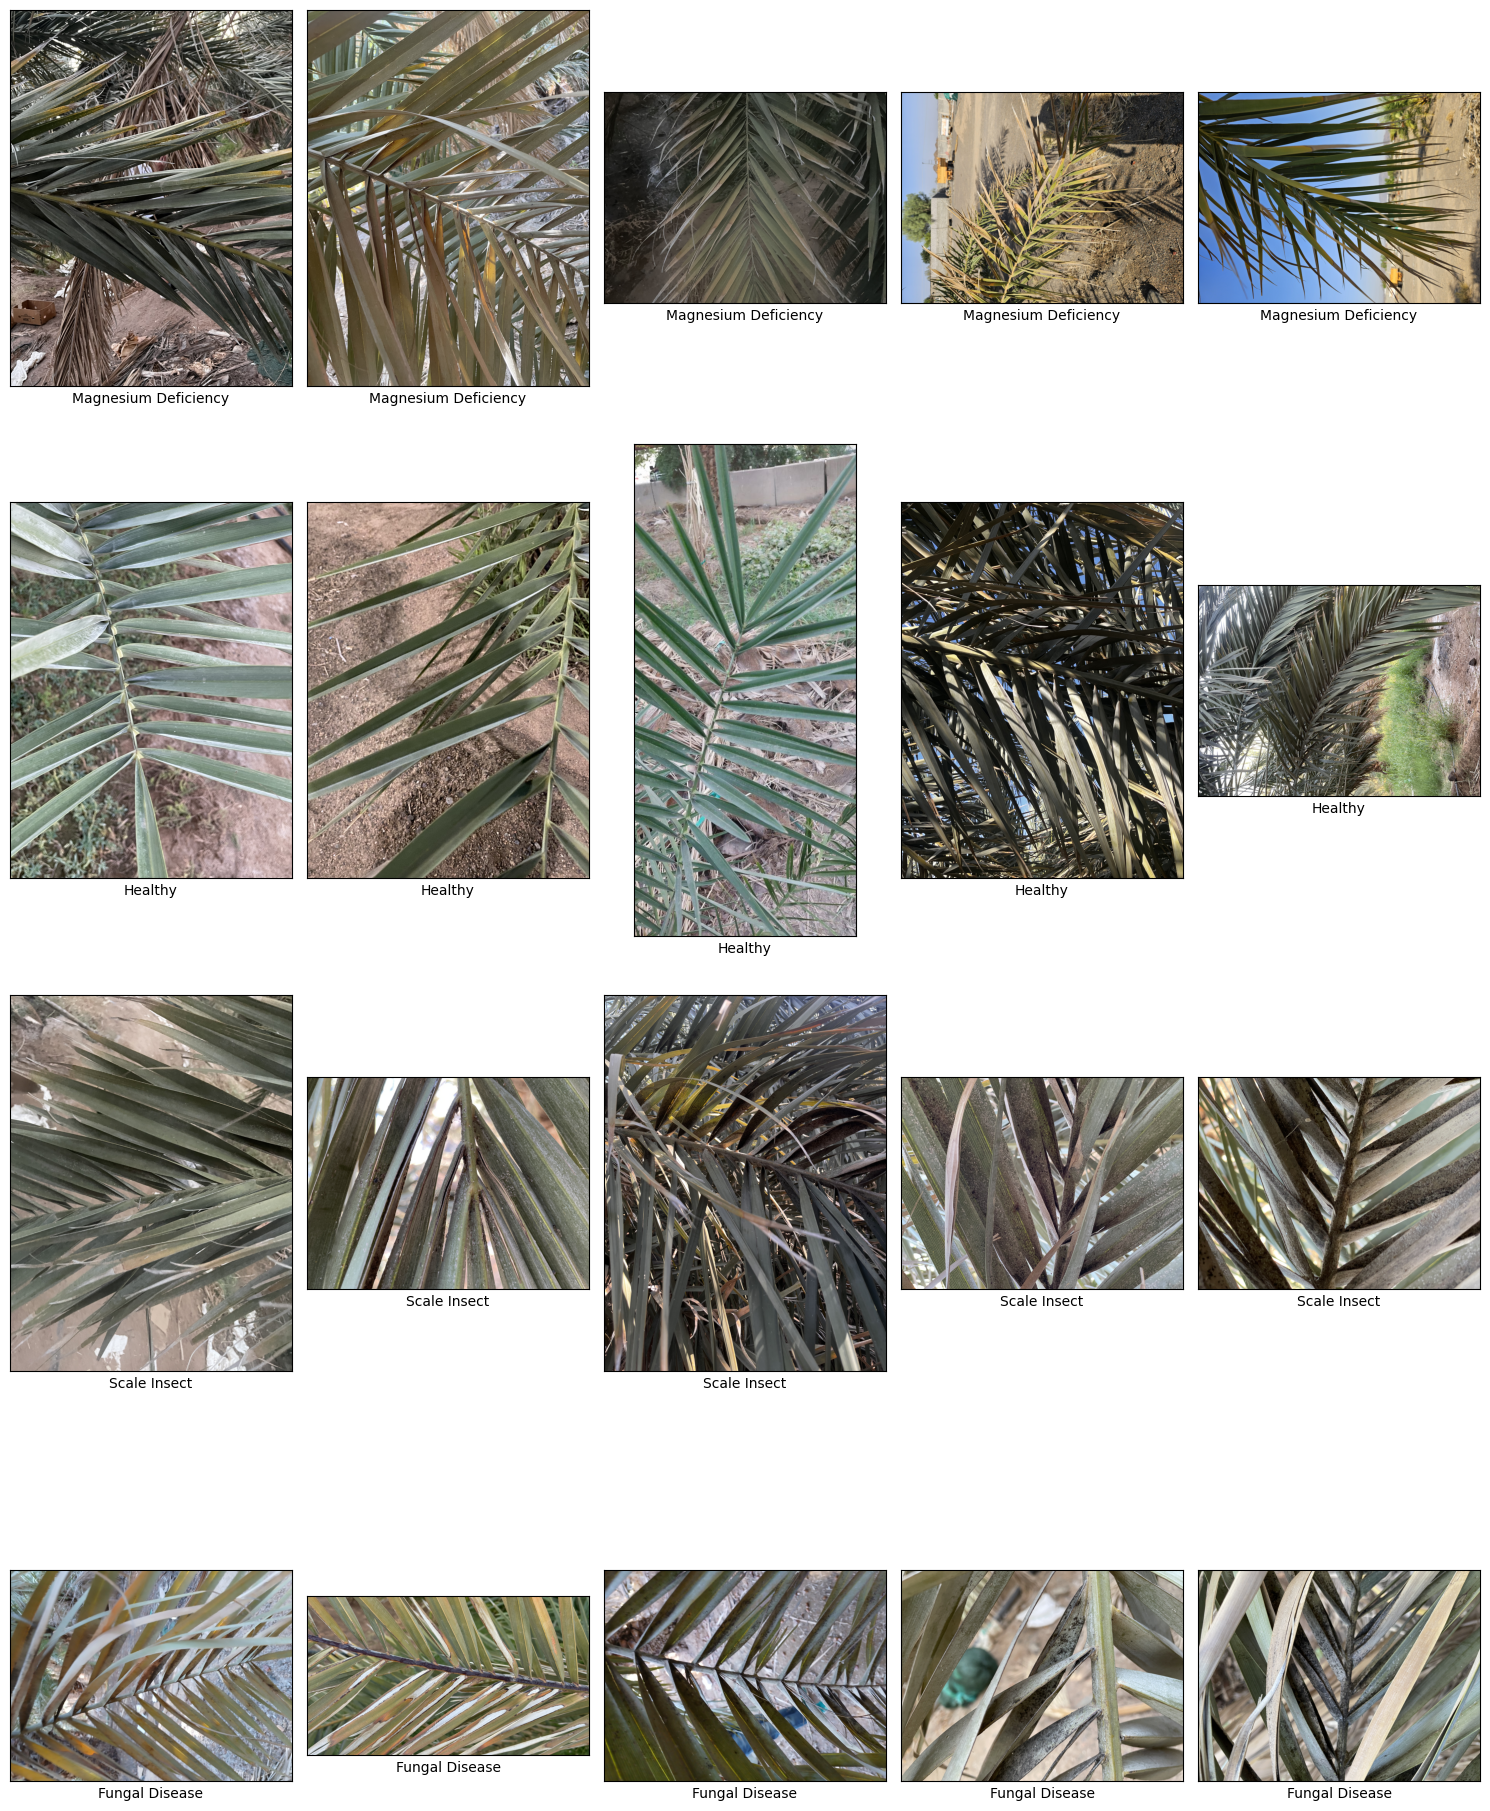

In [19]:
# Membuat dictionary untuk menyimpan gambar untuk setiap kelas dalam data
palm_disease_image = {}

# Menentukan path sumber dataset
source_path = "dataset/palm-disease-dataset/"

for i in os.listdir(source_path):
  palm_disease_image[i]  = os.listdir(source_path + i)

# menampilkan secara acak 5 gambar untuk masing-masing kelas
fig, ax = plt.subplots(4, 5, figsize=(15, 20))

for i, label in enumerate(os.listdir(source_path)):
  images = np.random.choice(palm_disease_image[label], 5, replace=False)
  for j, image in enumerate(images):
    img_path = os.path.join(source_path, label, image)
    img = Image.open(img_path)
    ax[i, j].imshow(img)
    ax[i, j].set(xlabel=label, xticks=[], yticks=[])

fig.tight_layout()

In [21]:
# Membuat fungsi untuk melihat jumlah image tiap-tiap kelas
def get_image_count(path):
  image_count = {}
  for label in os.listdir(path):
    image_count[label] = len(os.listdir(os.path.join(path, label)))
  return image_count

print(get_image_count(source_path))

{'Magnesium Deficiency': 69, 'Healthy': 37, 'Scale Insect': 80, 'Fungal Disease': 53}


### Distribution Plot of Class Dataset

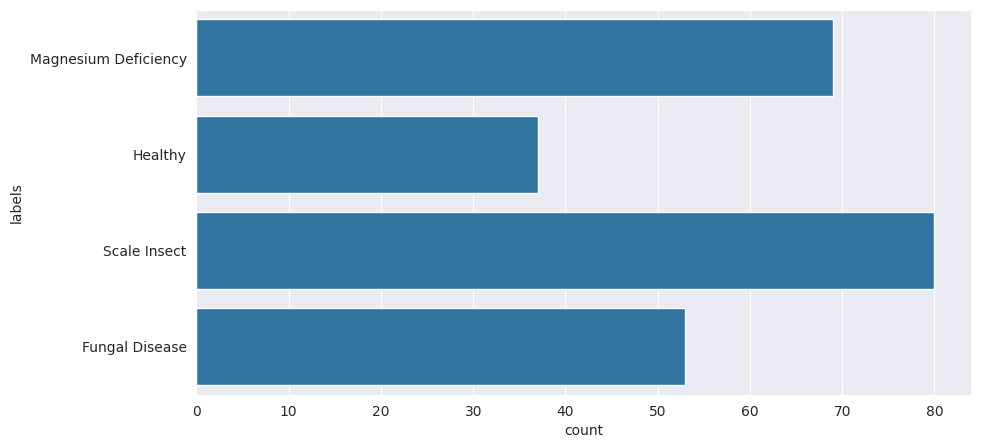

In [25]:
def plot_distribution(path):
  # Membuat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
  file_name = []
  labels = []
  full_path = []

  # Mendapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai DataFrame
  for path, subdirs, files in os.walk(path):
    for name in files:
      file_name.append(name)
      labels.append(path.split('/')[-1])
      full_path.append(os.path.join(path, name))

  distribution_train = pd.DataFrame({
      'path': full_path,
      'file_name': file_name,
      'labels': labels
  })

  # Plot distribusi gambar setiap kelas
  label = distribution_train['labels']
  plt.figure(figsize=(10, 5))
  sns.set_style('darkgrid')
  sns.countplot(label)

plot_distribution(source_path)

## Preprocessing Data

### Augmentation Data

### Spliting Data

### Image Data Generator

## Building Model

## Evaluating Model

## Converting Model

## Inferring Model